# Libraries and paths

In [12]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
import torch    
import numpy as np
import scipy
import nibabel as nib
import os
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import torchio as tio

ModuleNotFoundError: No module named 'torchio'

In [2]:
nifti_dir = "/home/canhdx/workspace/age-prediction-using-MRI/not_skull_stripped"
meta_dir = "/home/canhdx/workspace/age-prediction-using-MRI/label.xlsx"

# Data info

In [3]:
#load nifti files
meta_df = pd.read_excel(meta_dir)
meta_df.head(20)

,subject_age,subject_dx,subject_sex,subject_id,dataset_name
0,44.2,control,1,sub-BrainAge000019,ABIDE/Caltech
1,39.3,control,1,sub-BrainAge000020,ABIDE/Caltech
2,42.5,control,1,sub-BrainAge000021,ABIDE/Caltech
3,19.7,control,1,sub-BrainAge000022,ABIDE/Caltech
4,20.0,control,0,sub-BrainAge000023,ABIDE/Caltech
5,20.8,control,0,sub-BrainAge000024,ABIDE/Caltech
6,27.9,control,1,sub-BrainAge000025,ABIDE/Caltech
7,21.1,control,0,sub-BrainAge000026,ABIDE/Caltech
8,20.9,control,1,sub-BrainAge000027,ABIDE/Caltech
9,23.6,control,1,sub-BrainAge000028,ABIDE/Caltech


In [4]:
print(meta_df['subject_dx'].unique())

['control']


In [6]:
#find how many control patient in subject_dx
print(meta_df['subject_dx'].value_counts())
control = meta_df[meta_df['subject_dx'] == 'control']
control.head(20)

subject_dx
control    4948
Name: count, dtype: int64


,subject_age,subject_dx,subject_sex,subject_id,dataset_name
0,44.2,control,1,sub-BrainAge000019,ABIDE/Caltech
1,39.3,control,1,sub-BrainAge000020,ABIDE/Caltech
2,42.5,control,1,sub-BrainAge000021,ABIDE/Caltech
3,19.7,control,1,sub-BrainAge000022,ABIDE/Caltech
4,20.0,control,0,sub-BrainAge000023,ABIDE/Caltech
5,20.8,control,0,sub-BrainAge000024,ABIDE/Caltech
6,27.9,control,1,sub-BrainAge000025,ABIDE/Caltech
7,21.1,control,0,sub-BrainAge000026,ABIDE/Caltech
8,20.9,control,1,sub-BrainAge000027,ABIDE/Caltech
9,23.6,control,1,sub-BrainAge000028,ABIDE/Caltech


In [7]:
print(meta_df['dataset_name'].unique())

['ABIDE/Caltech' 'ABIDE/CMU_a' 'ABIDE/CMU_b' 'ABIDE/Leuven_1' 'CORR/LMU_2'
 'CORR/LMU_3' 'CORR/MRN' 'CORR/NKI_TRT' 'CORR/NYU_1' 'CORR/NYU_2'
 'CORR/SWU_1' 'CORR/SWU_2' 'CORR/SWU_3' 'CORR/SWU_4' 'CORR/UM'
 'CORR/UPSM_1' 'CORR/Utah_1' 'CORR/Utah_2' 'CORR/UWM' 'CORR/XHCUMS'
 'ds000030' 'ds000171' 'ds000212' 'ds000214' 'ds000233' 'ds002773'
 'ds002938' 'ds003338' 'ds003521' 'ds003745' 'ds003831' 'ds004094'
 'ds004302' 'INDI/SALD' 'INDI/SLIM' 'IXI' 'OASIS_3' 'PDD/neurocon'
 'RocklandSample']


In [8]:
age_counts = control['subject_age'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=age_counts.index, y=age_counts.values, marker='o')
plt.title('Number of Control Patients at Each Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>

In [9]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4948 entries, 0 to 4947
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   subject_age   4948 non-null   float64
 1   subject_dx    4948 non-null   object 
 2   subject_sex   4948 non-null   int64  
 3   subject_id    4948 non-null   object 
 4   dataset_name  4948 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 193.4+ KB


In [10]:
control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4948 entries, 0 to 4947
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   subject_age   4948 non-null   float64
 1   subject_dx    4948 non-null   object 
 2   subject_sex   4948 non-null   int64  
 3   subject_id    4948 non-null   object 
 4   dataset_name  4948 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 193.4+ KB


In [11]:
def downsample_to_shape(image, target_shape):
    zoom_factors = np.array(target_shape) / np.array(image.shape)
    return scipy.ndimage.zoom(image, zoom_factors, order=3)

# Adding noise

## Client 1: Rician noise + Motion Artifacts

In [9]:
TRANSFORM_CONFIG = {
    'motion_degrees': 2,
    'motion_translation': 2,
    'motion_num_transforms': 1,
    'noise_std_range': (0.05, 0.05),
    'apply_prob': 1.0
}

In [10]:
class RicianNoiseMotion(tio.Transform):
    def __init__(self, config):
        super().__init__(p=config['apply_prob'])
        self.motion = tio.RandomMotion(
            degrees=config['motion_degrees'],
            translation=config['motion_translation'],
            num_transforms=config['motion_num_transforms'],
            image_interpolation='linear'
        )
        self.noise_std = config['noise_std_range']
        
    def apply_transform(self, subject):
        #Motion
        subject = self.motion(subject)
        
        #Rician noise
        image_data = subject.t1.data
        std = random.uniform(*self.noise_std)
        noise_real = torch.randn_like(image_data) * std
        noise_imag = torch.randn_like(image_data) * std
        noisy_image = torch.sqrt((image_data + noise_real)**2 + noise_imag**2)
        subject.t1.set_data(noisy_image)
        
        return subject

NameError: name 'tio' is not defined

In [13]:
transform = RicianNoiseMotion(TRANSFORM_CONFIG)

## Client 2: Gaussian Blur.

In [12]:
BLUR_SIGMA = 1.0

In [5]:
def apply_gaussian_blur(data, original_pixdim, sigma_mm=1.0):
    #convert mm sigma to voxel units
    sigma_voxels = [sigma_mm / dim for dim in original_pixdim]
    
    #apply Gaussian filter
    blurred_data = scipy.ndimage.gaussian_filter(data, sigma=sigma_voxels)
    
    return blurred_data

## Client 3: Synthetic Bias Field (cubic polynomial)

In [14]:
def apply_synthetic_bias_field(data):
    X, Y, Z = data.shape
    
    #generate normalized coordinates [-1, 1] for each axis
    x = np.linspace(-1, 1, X)
    y = np.linspace(-1, 1, Y)
    z = np.linspace(-1, 1, Z)
    
    #random cubic coefficients for each axis (order: constant, linear, quadratic, cubic)
    np.random.seed()  # Remove seed for variability; use seed in tests if needed
    coeffs_x = np.random.normal(0, 0.1, 4)
    coeffs_y = np.random.normal(0, 0.1, 4)
    coeffs_z = np.random.normal(0, 0.1, 4)
    
    #ensure constant term is ~1 to avoid global intensity shift
    coeffs_x[0] += 1
    coeffs_y[0] += 1
    coeffs_z[0] += 1
    
    #evaluate 1D polynomials
    poly_x = poly.polyval(x, coeffs_x)
    poly_y = poly.polyval(y, coeffs_y)
    poly_z = poly.polyval(z, coeffs_z)
    
    #create 3D bias field using broadcasting
    bias_field = poly_x[:, np.newaxis, np.newaxis] * poly_y[np.newaxis, :, np.newaxis] * poly_z[np.newaxis, np.newaxis, :]
    
    return data * bias_field

## Client 4: Random Crop (70% FOV)

In [15]:
def random_crop_70(image):
    original_shape = image.shape
    crop_size = [int(0.7 * dim) for dim in original_shape]
    #ensure the crop can reach the far edge by adding 1 to upper bound
    starts = [np.random.randint(0, (dim - size) + 1) for dim, size in zip(original_shape, crop_size)]
    #perform the crop
    cropped_image = image[
        starts[0]:starts[0] + crop_size[0],
        starts[1]:starts[1] + crop_size[1],
        starts[2]:starts[2] + crop_size[2]
    ]
    return cropped_image, starts

## Client 5: Gamma Correction($\gamma =  0.5$)


In [13]:
def apply_gamma_correction(image, gamma=0.5, epsilon=1e-8):
    image = image.astype(np.float32)
    min_val = np.min(image)
    max_val = np.max(image)
    
    #handle constant images
    if (max_val - min_val) < epsilon:
        return image
    
    #normalize to [0, 1] 
    normalized = (image - min_val) / (max_val - min_val)
    
    #apply gamma correction
    gamma_corrected = np.power(normalized, gamma)
    
    #scale back to original intensity range
    gamma_corrected = gamma_corrected * (max_val - min_val) + min_val
    
    return gamma_corrected.astype(np.float32)

# Main preprocess

In [17]:
new_spacing = [1, 1, 1] 
#if using client 4 fix the desired shape to (91, 91, 91)
DESIRED_SHAPE = (65, 65, 55)  

In [6]:
def loadData(sub_id, input_folder):
    img_path = os.path.join(input_folder, str(sub_id), "anat")
    for filename in os.listdir(img_path):
        if filename.endswith(".nii") or filename.endswith(".nii.gz") and filename.startswith(sub_id):
            img = nib.load(os.path.join(img_path, filename))
            data = img.get_fdata()
            pixdim = img.header['pixdim'][1:4]
            affine = img.affine
            return data, pixdim, affine
    raise FileNotFoundError(f"No NIfTI file found for {sub_id}")

In [7]:
data, pixdim, affine = loadData("sub-BrainAge000045", nifti_dir)
print("Data shape:", data.shape)

Data shape: (130, 130, 130)


In [20]:
def pad_or_crop(image, target_shape):
    pad_width = []
    for dim in range(3):
        current_size = image.shape[dim]
        target_size = target_shape[dim]
        
        if current_size < target_size:
            #pad symmetrically
            diff = target_size - current_size
            pad_before = diff // 2
            pad_after = diff - pad_before
            pad_width.append((pad_before, pad_after))
        else:
            #crop symmetrically
            start = (current_size - target_size) // 2
            end = start + target_size
            image = image.take(indices=range(start, end), axis=dim)
            pad_width.append((0, 0))
    
    return np.pad(image, pad_width, mode='constant', constant_values=0)

In [21]:
def resample(image, original_pixdim, new_spacing=[1, 1, 1]):
    resize_factor = np.array(original_pixdim) / np.array(new_spacing)
    
    resampled_image = scipy.ndimage.zoom(
        image, 
        resize_factor, 
        order=3,  
        mode='nearest'  
    )
    
    return resampled_image

In [23]:
INPUT_FOLDER = nifti_dir
OUTPUT_FOLDER = "/home/canhdx/workspace/age-prediction-using-MRI/test"

for _, row in control.iterrows():
    sub_id = row['subject_id']
    age = row['subject_age']  
    
    try:
        #load data
        data, pixdim, affine = loadData(sub_id, INPUT_FOLDER)

        # #c1: apply transform
        # tensor = torch.from_numpy(data).unsqueeze(0).float()  
        # subject = tio.Subject(
        #     t1=tio.ScalarImage(tensor=tensor, affine=affine)
        # )
        # transformed_subject = transform(subject)
        # transformed_data = transformed_subject.t1.data.squeeze().numpy()
        # data = transformed_data
        
        #c2: apply Gaussian blur(downsample by changing the desired shape smaller than the original shape)
        data = apply_gaussian_blur(data, new_spacing, BLUR_SIGMA)

        # #c3: synthetic bias field
        # data = apply_synthetic_bias_field(data)

        # #c4: Random crop 70%
        # data, starts = random_crop_70(data)

        #preprocess
        resampled = resample(data, pixdim, [1,1,1])
        # #c5: gamma correction
        # resampled = apply_gamma_correction(resampled)
        # padded = pad_or_crop(resampled, DESIRED_SHAPE)
        downsampled = downsample_to_shape(resampled, DESIRED_SHAPE) 
        normalized = (downsampled - np.mean(downsampled)) / np.std(downsampled)  #Intensity normalization
        
        #save
        np.save(f"{OUTPUT_FOLDER}/{sub_id}.npy", normalized)
        
    except FileNotFoundError:
        print(f"Skipping {sub_id}: NIfTI file not found")
    except Exception as e:
        print(f"Error processing {sub_id}: {str(e)}")

KeyboardInterrupt: 

(91, 109, 91)


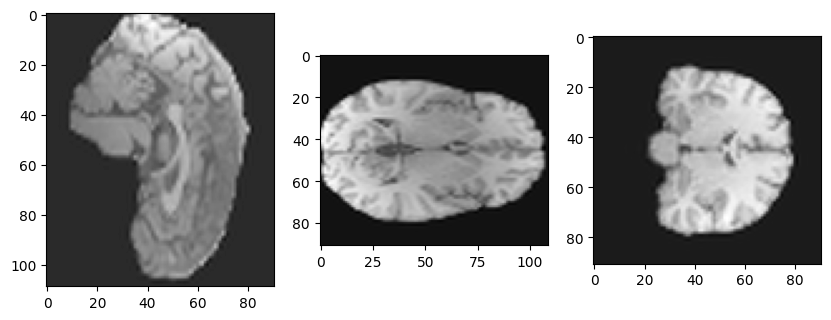

In [1]:
import numpy as np
sample = np.load("/home/canhdx/workspace/age-prediction-using-MRI/preprocessed_data/sub-BrainAge000019.npy")
print(sample.shape)

import matplotlib .pyplot as plt
plt.figure(figsize=(10, 10))
#sagittal view of middle slice
plt.subplot(1, 3, 1)
plt.imshow(sample[45, :, :], cmap='gray')
#axial view of middle slice
plt.subplot(1, 3, 2)
plt.imshow(sample[:, :, 45], cmap='gray')
#coronal view of middle slice
plt.subplot(1, 3, 3)
plt.imshow(sample[:, 55, :], cmap='gray') 
plt.show()

In [25]:
plt.imshow(sample[:, 65, :], cmap='gray') 
plt.show()

IndexError: index 65 is out of bounds for axis 1 with size 65

# TEST

## Client 1

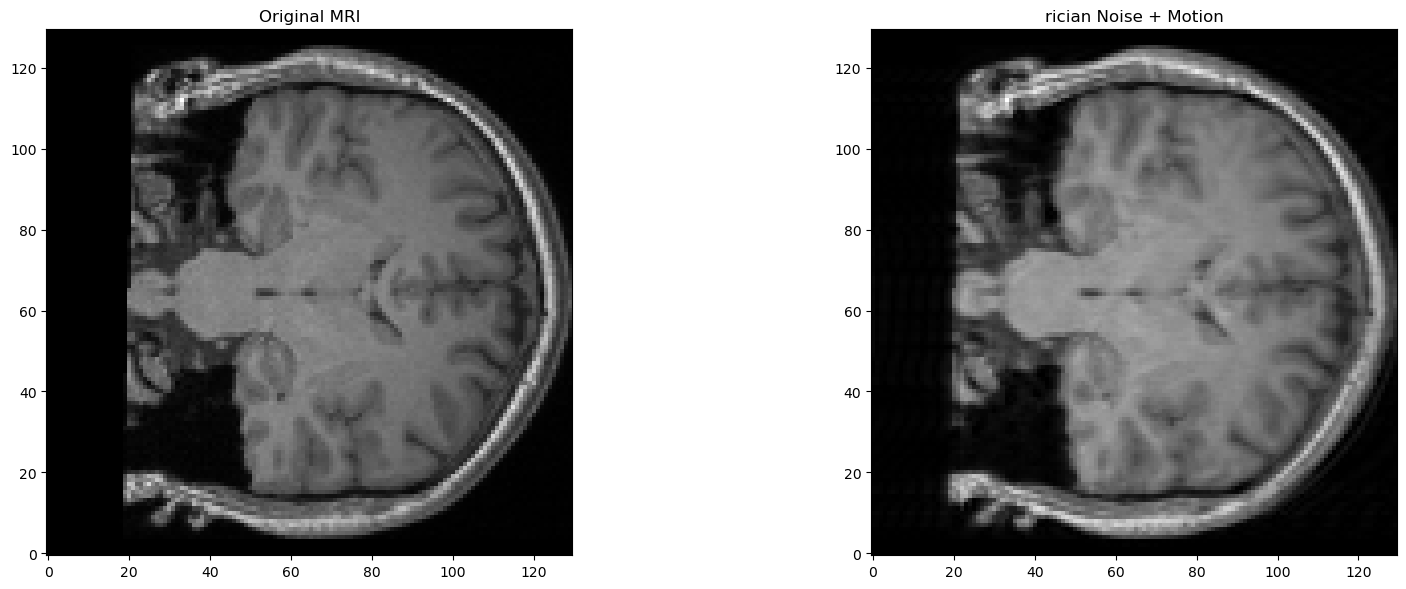

In [14]:
test_sub_id = "sub-BrainAge000045"
data, pixdim, affine = loadData(test_sub_id, nifti_dir)
tensor = torch.from_numpy(data).unsqueeze(0).float()  
subject = tio.Subject(
    t1=tio.ScalarImage(tensor=tensor, affine=affine)
)
transformed_subject = transform(subject)
transformed_data = transformed_subject.t1.data.squeeze().numpy()

slice_idx = data.shape[0] // 2  
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.imshow(data[:, slice_idx, :], cmap='gray', origin='lower')
plt.title("Original MRI")

plt.subplot(1, 2, 2)
plt.imshow(transformed_data[:, slice_idx, :], cmap='gray', origin='lower')
plt.title("rician Noise + Motion")

plt.tight_layout()
plt.show()

## Client 2

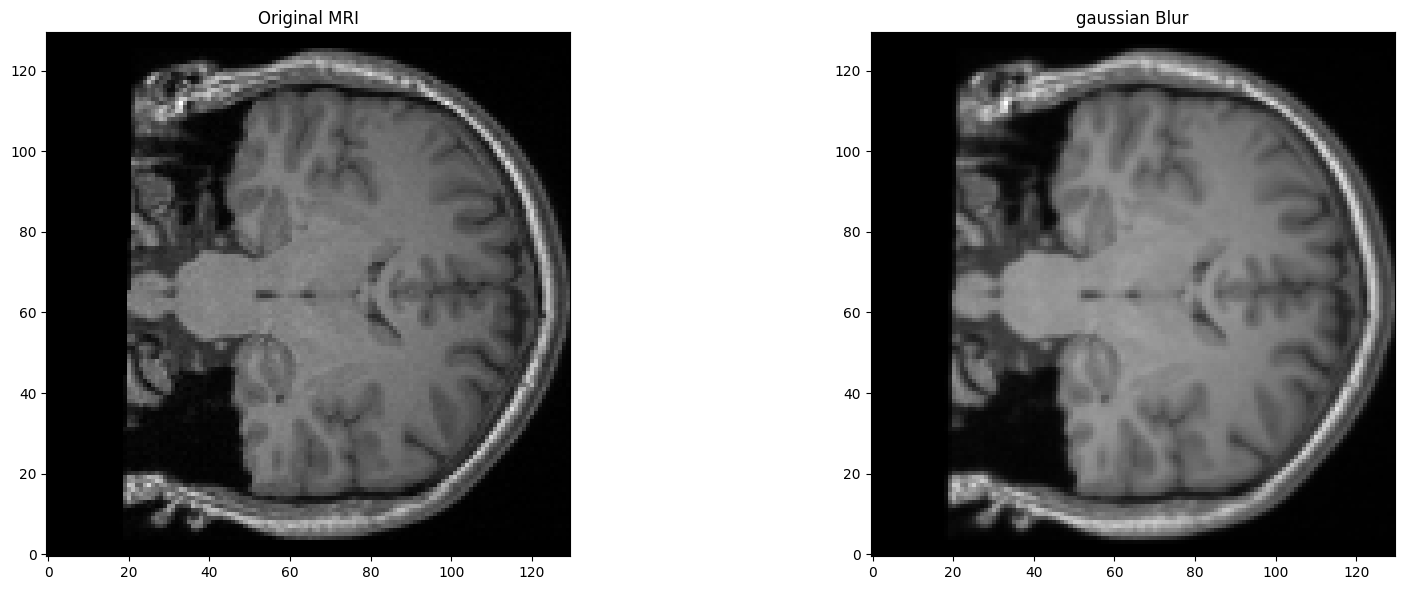

In [8]:
test_sub_id = "sub-BrainAge000045"
data, pixdim, affine = loadData(test_sub_id, nifti_dir)

np.random.seed(42)
gaussian = apply_gaussian_blur(data, pixdim, sigma_mm=0.5)

slice_idx = data.shape[0] // 2  
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.imshow(data[:, slice_idx, :], cmap='gray', origin='lower')
plt.title("Original MRI")

plt.subplot(1, 2, 2)
plt.imshow(gaussian[:, slice_idx, :], cmap='gray', origin='lower')
plt.title("gaussian Blur")

plt.tight_layout()
plt.show()

## Client 3


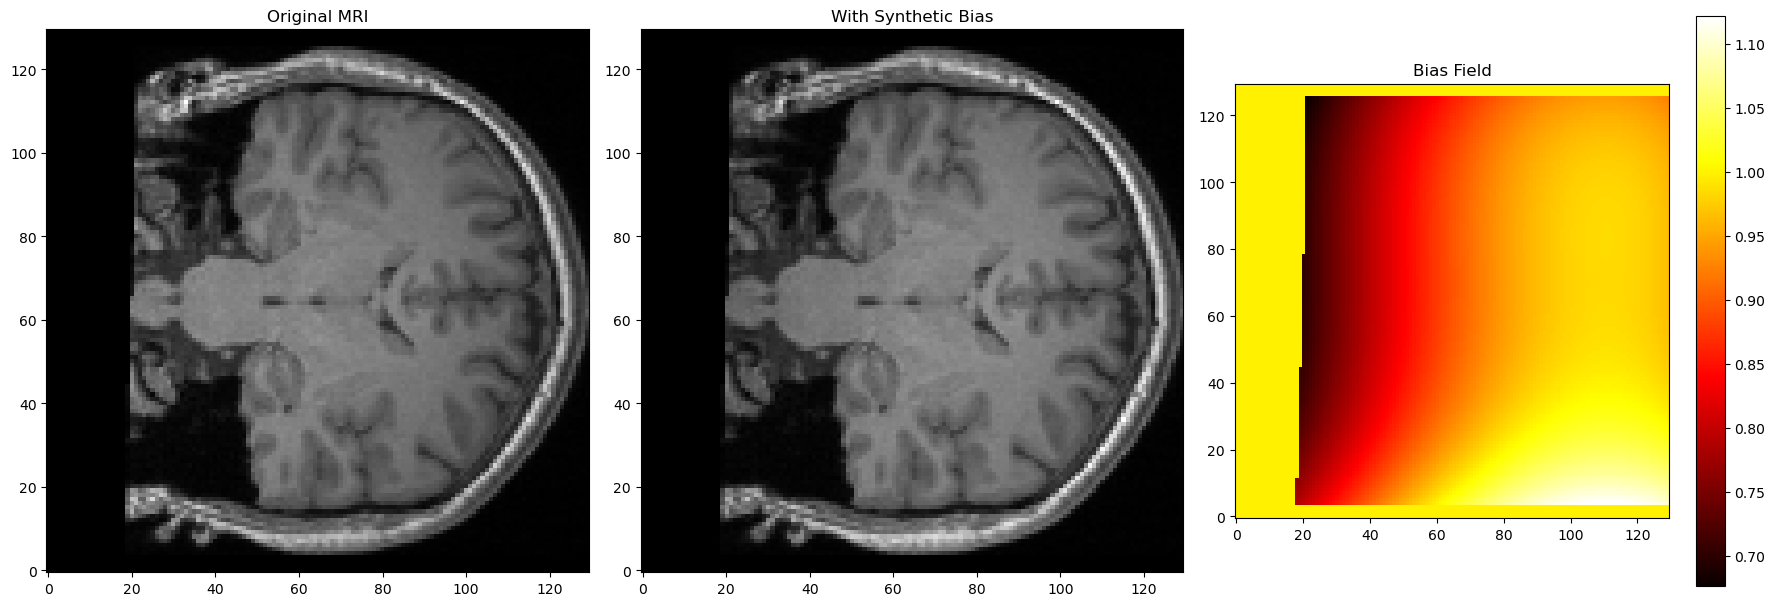

In [53]:
test_sub_id = "sub-BrainAge000045"
data, pixdim, affine = loadData(test_sub_id, nifti_dir)

np.random.seed(42)
biased_data = apply_synthetic_bias_field(data)

epsilon = 1e-6
mask = data > epsilon
bias_field = np.ones_like(data)
bias_field[mask] = biased_data[mask] / data[mask]

slice_idx = data.shape[0] // 2  
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(data[:, slice_idx, :], cmap='gray', origin='lower')
plt.title("Original MRI")

plt.subplot(1, 3, 2)
plt.imshow(biased_data[:, slice_idx, :], cmap='gray', origin='lower')
plt.title("With Synthetic Bias")

plt.subplot(1, 3, 3)
plt.imshow(bias_field[:, slice_idx, :], cmap='hot', origin='lower')
plt.title("Bias Field")
plt.colorbar()

plt.tight_layout()
plt.show()

## Client 4

Original shape: (130, 130, 130)
Cropped shape: (91, 91, 91)


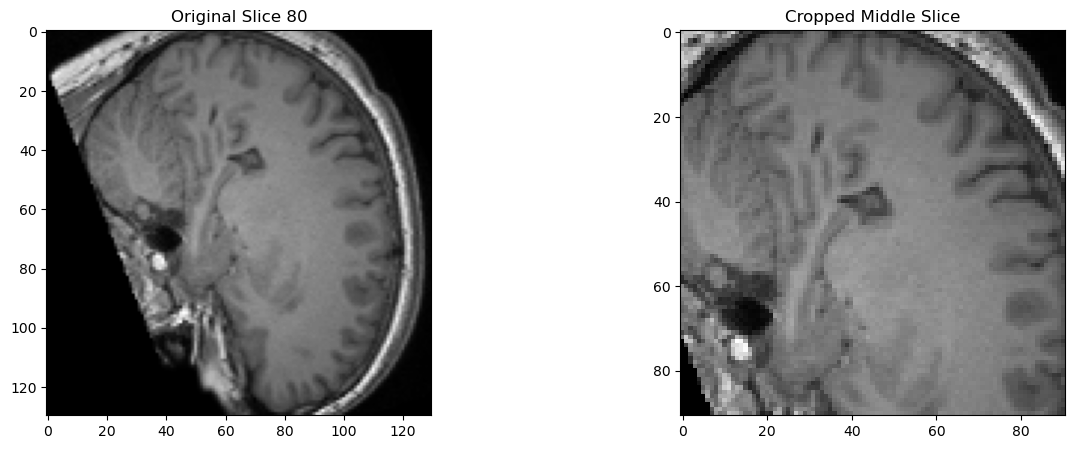

In [40]:
# %% Test Cell (Revised)
# Load a sample subject
sub_id_test = "sub-BrainAge000045"
original_data, pixdim_test, affine = loadData(sub_id_test, nifti_dir)
print("Original shape:", original_data.shape)

# Apply random crop and get starting indices
cropped_data, starts = random_crop_70(original_data)
print("Cropped shape:", cropped_data.shape)

# Calculate the corresponding middle slice in the ORIGINAL image
# For example, if the cropped image's middle slice is at index 35 (axis 0), 
# it corresponds to starts[0] + 35 in the original.
original_mid_crop = (
    starts[0] + cropped_data.shape[0] // 2,
    starts[1] + cropped_data.shape[1] // 2,
    starts[2] + cropped_data.shape[2] // 2
)

# Plot the same physical region in both images
plt.figure(figsize=(15, 5))

# Original Image (Slice that the cropped image's middle slice came from)
plt.subplot(1, 2, 1)
plt.imshow(original_data[original_mid_crop[0], :, :], cmap='gray')
plt.title(f'Original Slice {original_mid_crop[0]}')

# Cropped Image (Middle Slice)
plt.subplot(1, 2, 2)
plt.imshow(cropped_data[cropped_data.shape[0] // 2, :, :], cmap='gray')
plt.title('Cropped Middle Slice')

plt.show()

## Client 5

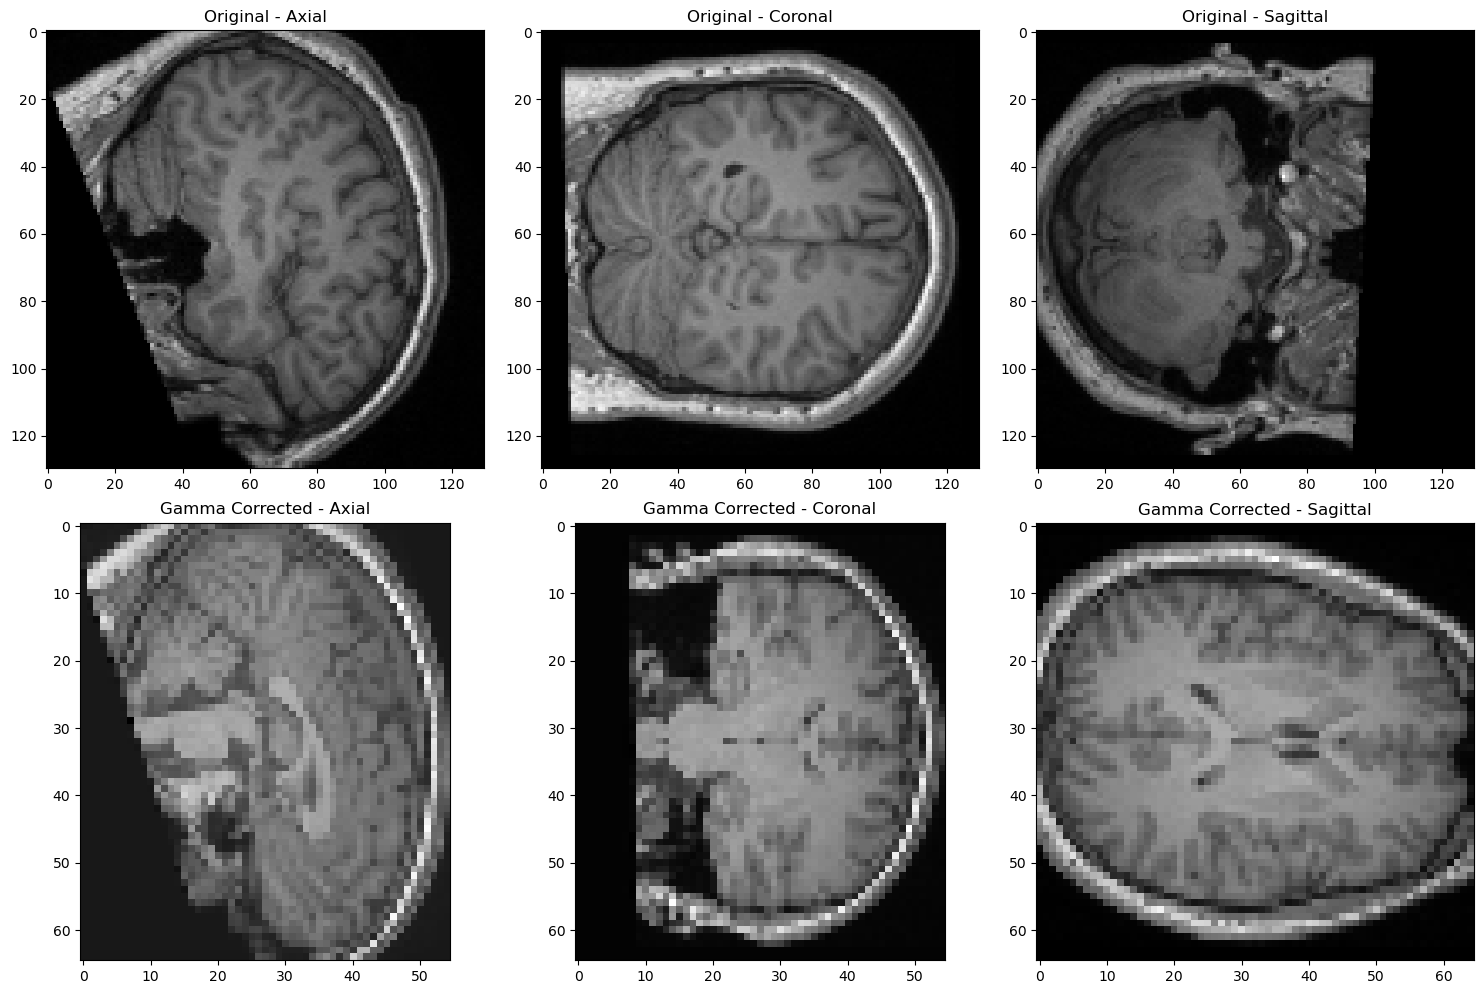

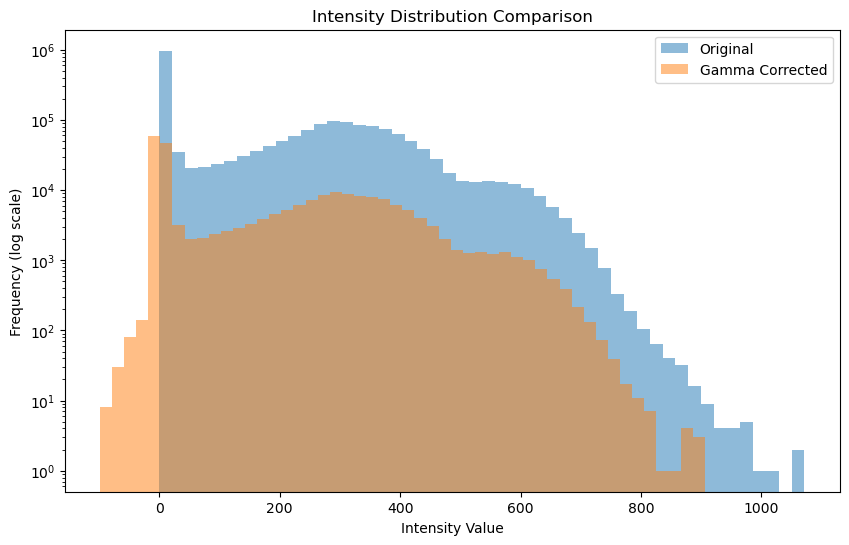

In [20]:
TEST_SUBJECT_ID = "sub-BrainAge000045"
SLICE_INDEX = 32

try:
    original_data, _, affine = loadData(TEST_SUBJECT_ID, nifti_dir)
    resampled_data = resample(original_data, [1, 1, 1], [1, 1, 1])
    
    gamma_data = downsample_to_shape(resampled_data, (65,65,55))
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    axes[0, 0].imshow(resampled_data[SLICE_INDEX, :, :], cmap='gray')
    axes[0, 0].set_title('Original - Axial')
    axes[0, 1].imshow(resampled_data[:, SLICE_INDEX, :], cmap='gray')
    axes[0, 1].set_title('Original - Coronal')
    axes[0, 2].imshow(resampled_data[:, :, SLICE_INDEX], cmap='gray')
    axes[0, 2].set_title('Original - Sagittal')
    
    axes[1, 0].imshow(gamma_data[SLICE_INDEX, :, :], cmap='gray')
    axes[1, 0].set_title('Gamma Corrected - Axial')
    axes[1, 1].imshow(gamma_data[:, SLICE_INDEX, :], cmap='gray')
    axes[1, 1].set_title('Gamma Corrected - Coronal')
    axes[1, 2].imshow(gamma_data[:, :, SLICE_INDEX], cmap='gray')
    axes[1, 2].set_title('Gamma Corrected - Sagittal')
    
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 6))
    plt.hist(resampled_data.flatten(), bins=50, alpha=0.5, label='Original')
    plt.hist(gamma_data.flatten(), bins=50, alpha=0.5, label='Gamma Corrected')
    plt.yscale('log')
    plt.title('Intensity Distribution Comparison')
    plt.xlabel('Intensity Value')
    plt.ylabel('Frequency (log scale)')
    plt.legend()
    plt.show()

except Exception as e:
    print(f"Test failed: {str(e)}")

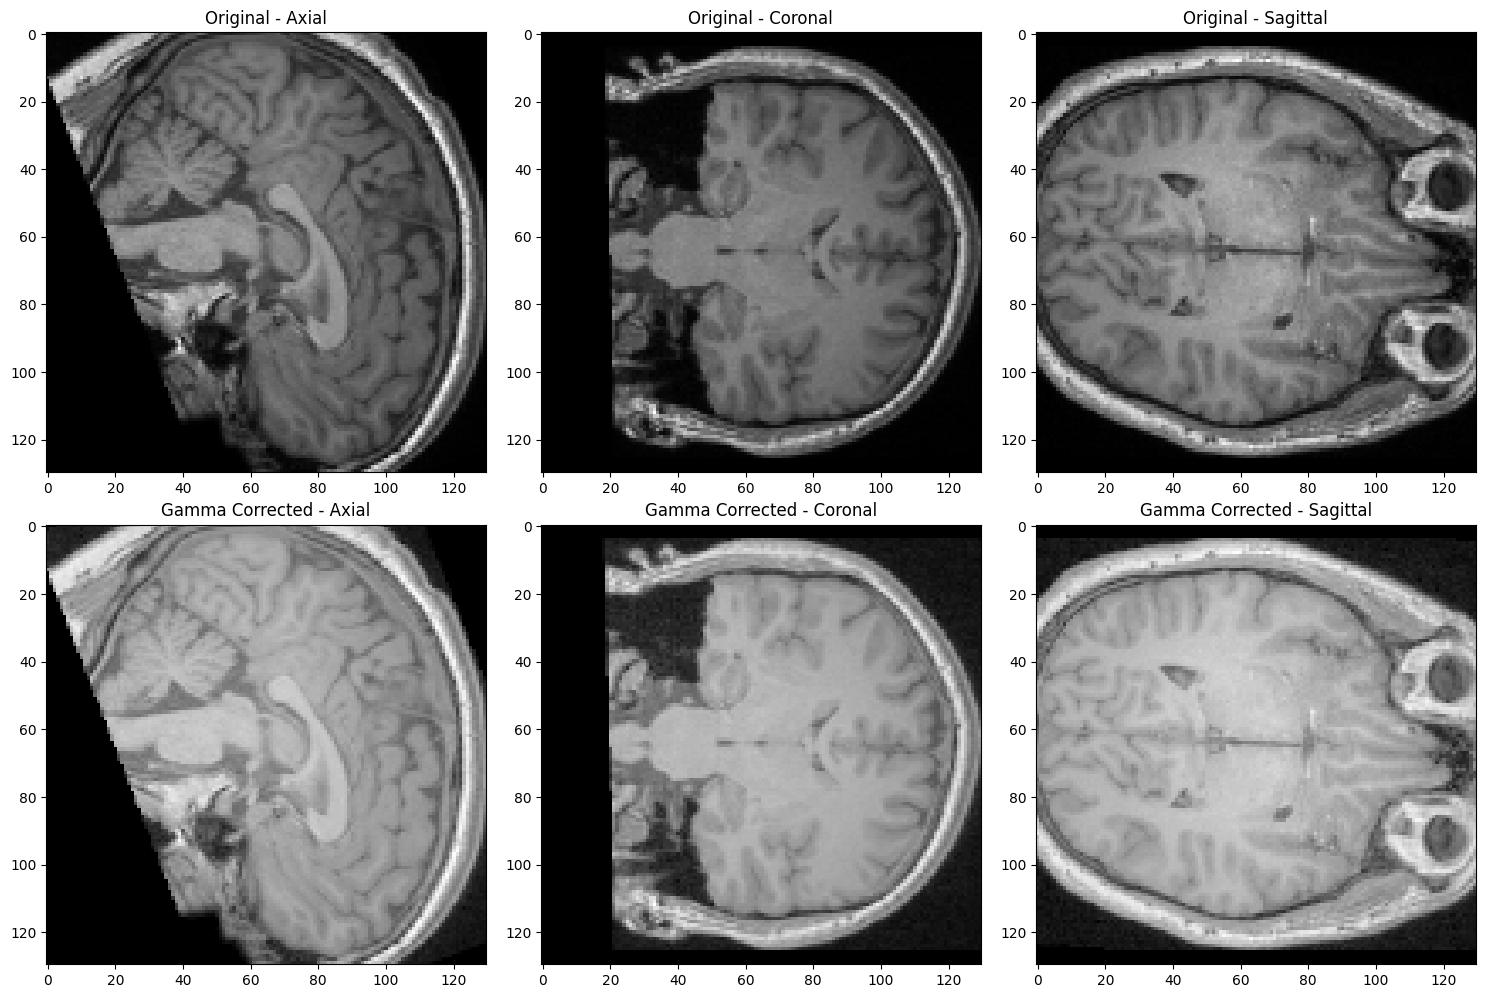

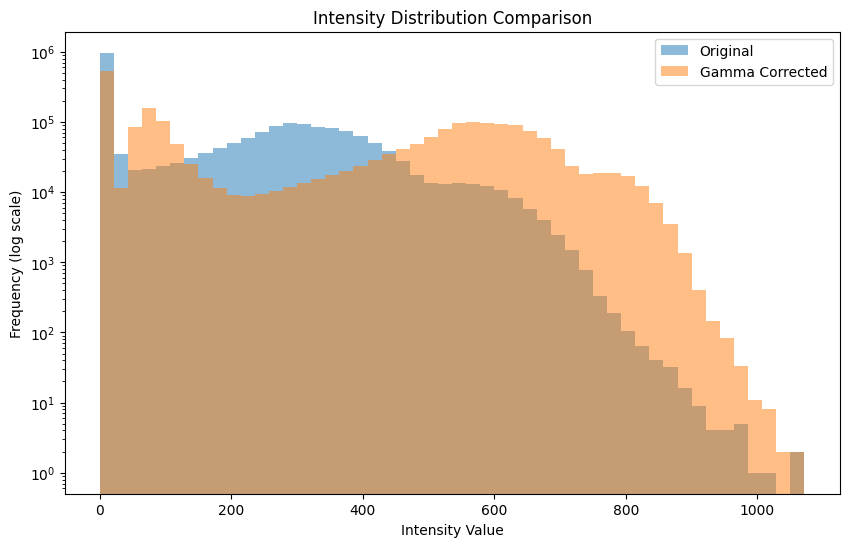

In [15]:
TEST_SUBJECT_ID = "sub-BrainAge000045"

try:
    original_data, _, affine = loadData(TEST_SUBJECT_ID, nifti_dir)
    gamma_data = apply_gamma_correction(original_data, gamma=0.5)
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    SLICE_INDEX = original_data.shape[0] // 2
    axes[0, 0].imshow(original_data[SLICE_INDEX, :, :], cmap='gray')
    axes[0, 0].set_title('Original - Axial')
    axes[0, 1].imshow(original_data[:, SLICE_INDEX, :], cmap='gray')
    axes[0, 1].set_title('Original - Coronal')
    axes[0, 2].imshow(original_data[:, :, SLICE_INDEX], cmap='gray')
    axes[0, 2].set_title('Original - Sagittal')
    
    axes[1, 0].imshow(gamma_data[SLICE_INDEX, :, :], cmap='gray')
    axes[1, 0].set_title('Gamma Corrected - Axial')
    axes[1, 1].imshow(gamma_data[:, SLICE_INDEX, :], cmap='gray')
    axes[1, 1].set_title('Gamma Corrected - Coronal')
    axes[1, 2].imshow(gamma_data[:, :, SLICE_INDEX], cmap='gray')
    axes[1, 2].set_title('Gamma Corrected - Sagittal')
    
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 6))
    plt.hist(original_data.flatten(), bins=50, alpha=0.5, label='Original')
    plt.hist(gamma_data.flatten(), bins=50, alpha=0.5, label='Gamma Corrected')
    plt.yscale('log')
    plt.title('Intensity Distribution Comparison')
    plt.xlabel('Intensity Value')
    plt.ylabel('Frequency (log scale)')
    plt.legend()
    plt.show()

except Exception as e:
    print(f"Test failed: {str(e)}")

In [ ]:
import pandas as pd
import os

# Paths
excel_path = r'C:\Users\ASUS\Documents\Lectures\PROJECT\DFL\fl-framework\Guy.xlsx'
npy_folder = r'C:\Users\ASUS\Documents\Lectures\PROJECT\DFL\fl-framework\server_data'
new_excel_path = 'filtered_excel_file.xlsx'

df = pd.read_excel(excel_path)

npy_files = set(os.listdir(npy_folder))  

def file_exists(subject_id):
    filename = f"{subject_id}.npy"
    return filename in npy_files

df_filtered = df[df['subject_id'].apply(file_exists)]

In [8]:
df_filtered.head()

,subject_age,subject_dx,subject_sex,subject_id,dataset_name
19,44.2,control,m,sub-BrainAge000019,ABIDE/Caltech
20,39.3,control,m,sub-BrainAge000020,ABIDE/Caltech
21,42.5,control,m,sub-BrainAge000021,ABIDE/Caltech
22,19.7,control,m,sub-BrainAge000022,ABIDE/Caltech
23,20,control,f,sub-BrainAge000023,ABIDE/Caltech


In [3]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4948 entries, 19 to 22813
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   subject_age   4948 non-null   object
 1   subject_dx    4948 non-null   object
 2   subject_sex   4948 non-null   object
 3   subject_id    4948 non-null   object
 4   dataset_name  4948 non-null   object
dtypes: object(5)
memory usage: 231.9+ KB


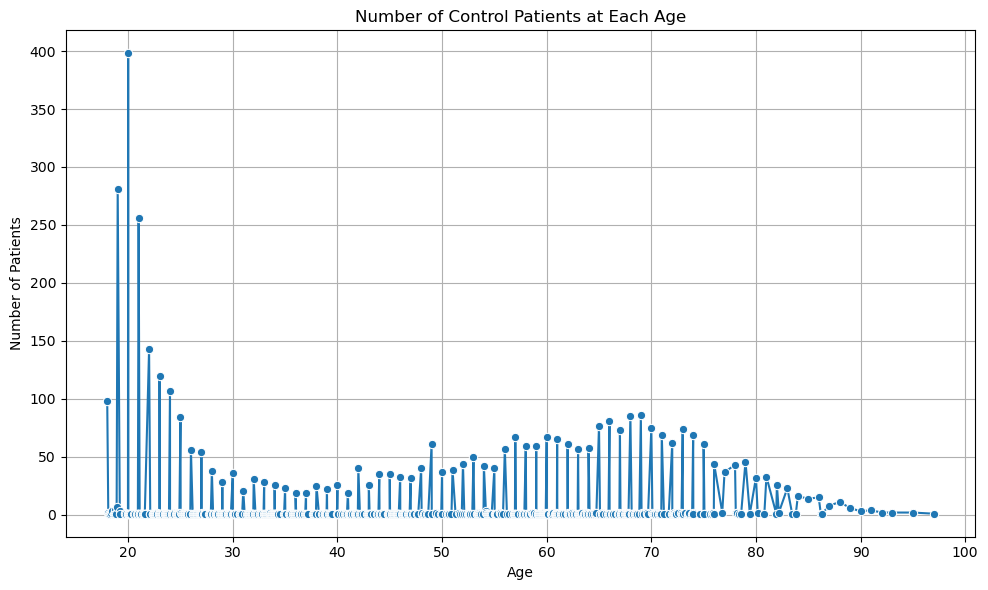

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
age_counts = df_filtered['subject_age'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=age_counts.index, y=age_counts.values, marker='o')
plt.title('Number of Control Patients at Each Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.grid(True)
plt.tight_layout()
plt.show()

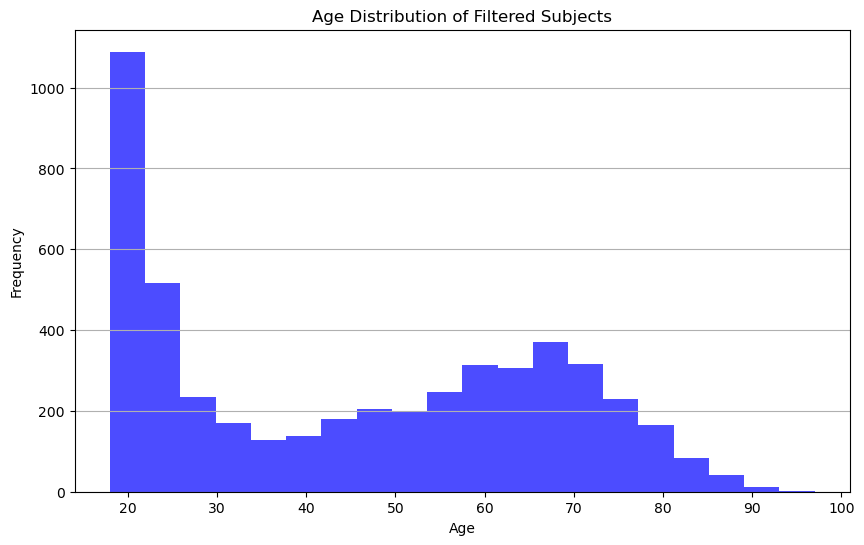

In [6]:
#plot the distribution of ages
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['subject_age'], bins=20, color='blue', alpha=0.7)
plt.title('Age Distribution of Filtered Subjects')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

In [7]:
# Save the filtered DataFrame to a new Excel file
df_filtered.to_excel(new_excel_path, index=False)